In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import datetime
import pickle
from sklearn.ensemble import RandomForestRegressor
from ydata_profiling import ProfileReport
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.base import BaseEstimator, TransformerMixin

In [5]:
data = pd.read_csv('./datasets/used car dataset.csv')

# EDA

## Sample data

In [6]:
data.sample(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Manufacturer_Model
15762,45779768,14113,-,BMW,328,2007,Sedan,Yes,Petrol,3,999999999 km,6.0,Tiptronic,Rear,04-May,Left wheel,Silver,16,BMW 328
2367,45729889,35309,730,SSANGYONG,Actyon,2016,Jeep,Yes,Diesel,1.6,112804 km,4.0,Automatic,Front,04-May,Left wheel,White,4,SSANGYONG Actyon
2053,45680165,7840,-,NISSAN,Note,2008,Sedan,No,Petrol,1.5,161468 km,4.0,Variator,Front,04-May,Right-hand drive,Golden,0,NISSAN Note
5291,45642682,862,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,130478 km,4.0,Automatic,Front,04-May,Left wheel,White,12,TOYOTA Camry
15659,45774327,21953,1079,SUBARU,Crosstrek,2018,Universal,Yes,Petrol,2,30400 km,4.0,Variator,4x4,04-May,Left wheel,Orange,10,SUBARU Crosstrek


## Shape of data

In [7]:
data.shape

(18287, 19)

## Column info

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18287 entries, 0 to 18286
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  18287 non-null  int64  
 1   Price               18287 non-null  int64  
 2   Levy                18287 non-null  object 
 3   Manufacturer        18287 non-null  object 
 4   Model               18287 non-null  object 
 5   Prod. year          18287 non-null  int64  
 6   Category            18287 non-null  object 
 7   Leather interior    18287 non-null  object 
 8   Fuel type           18287 non-null  object 
 9   Engine volume       18287 non-null  object 
 10  Mileage             18287 non-null  object 
 11  Cylinders           18287 non-null  float64
 12  Gear box type       18287 non-null  object 
 13  Drive wheels        18287 non-null  object 
 14  Doors               18287 non-null  object 
 15  Wheel               18287 non-null  object 
 16  Colo

In [9]:
num_cols = data.select_dtypes(include=[np.number]).columns
cat_cols = data.select_dtypes('object').columns

print(f"Numerical Columns: {num_cols}")
print(f"Categorical Columns: {cat_cols}")

Numerical Columns: Index(['ID', 'Price', 'Prod. year', 'Cylinders', 'Airbags'], dtype='object')
Categorical Columns: Index(['Levy', 'Manufacturer', 'Model', 'Category', 'Leather interior',
       'Fuel type', 'Engine volume', 'Mileage', 'Gear box type',
       'Drive wheels', 'Doors', 'Wheel', 'Color', 'Manufacturer_Model'],
      dtype='object')


## Null value count in each column

In [10]:
data.isnull().sum()

ID                    0
Price                 0
Levy                  0
Manufacturer          0
Model                 0
Prod. year            0
Category              0
Leather interior      0
Fuel type             0
Engine volume         0
Mileage               0
Cylinders             0
Gear box type         0
Drive wheels          0
Doors                 0
Wheel                 0
Color                 0
Airbags               0
Manufacturer_Model    0
dtype: int64

## Duplicate count and handling

In [11]:
print(data.duplicated().sum())

313


## Unique Values in each column

In [12]:
data.nunique()

ID                    17974
Price                  2274
Levy                    531
Manufacturer             50
Model                   648
Prod. year               49
Category                 11
Leather interior          2
Fuel type                 7
Engine volume           101
Mileage                7467
Cylinders                13
Gear box type             4
Drive wheels              3
Doors                     3
Wheel                     2
Color                    16
Airbags                  17
Manufacturer_Model      652
dtype: int64

## Dataset Summary

In [13]:
data.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.828700e+04,1.828700e+04,18287.000000,18287.000000,18287.000000
mean,4.558949e+07,1.822954e+04,2011.077049,4.566249,6.559961
std,9.149487e+05,1.951918e+05,5.457333,1.178007,4.332649
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.571496e+07,5.018000e+03,2009.000000,4.000000,4.000000
50%,4.577237e+07,1.285800e+04,2012.000000,4.000000,5.000000
75%,4.580224e+07,2.195300e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


## Detailed Description of Dataset

In [ ]:
profile = ProfileReport(data, title="Used Car Dataset Report")
profile.to_file("Used_Car_Dataset_Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

# Train Test Split

In [14]:
data['Manufacturer_Model'].nunique()

652

In [15]:
X = data.drop(['Price'], axis=1)  # 'Price' is the target variable
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=data['Manufacturer_Model']
)

In [16]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (14629, 18)
X_test shape: (3658, 18)
y_train shape: (14629,)
y_test shape: (3658,)


# Data Preprocessing

### Drop ID Column

In [17]:
X_train = X_train.drop(['ID'], axis=1)

### Filter out rows with price > 1000

In [18]:
X_train = X_train[y_train > 1000]
y_train = y_train[y_train > 1000]

In [19]:
print(y_train.max())
print(y_train.min())

26307500
1019


### Handle 'Levy' column

In [20]:
X_train['Levy'] = X_train['Levy'].str.replace('-', '0', regex=False).astype(int)

### Handle 'Mileage' Column

In [21]:
X_train['Mileage'] = X_train['Mileage'].str.replace('km', '', regex=False).astype(int)

### Handle 'Engine volume' column

In [22]:
X_train['Engine volume'] = X_train['Engine volume'].str.replace('Turbo', '', regex=False).astype(float)

### Calculate Age from Prod. Year column (current year - production year)

In [23]:
current_year = datetime.datetime.now().year
X_train['Age'] = current_year - X_train['Prod. year']

### Dropping Prod. Year

In [24]:
X_train = X_train.drop(['Prod. year'], axis=1)

In [25]:
X_train.dtypes

Levy                    int64
Manufacturer           object
Model                  object
Category               object
Leather interior       object
Fuel type              object
Engine volume         float64
Mileage                 int64
Cylinders             float64
Gear box type          object
Drive wheels           object
Doors                  object
Wheel                  object
Color                  object
Airbags                 int64
Manufacturer_Model     object
Age                     int64
dtype: object

In [37]:
print(X_train['Cylinders'].nunique())
print(data['Cylinders'].nunique())
data['Cylinders'].unique()

12
13


array([ 6.,  4.,  8.,  1.,  3., 12.,  2., 16.,  5.,  9.,  7., 10., 14.])

### Leather Interior 1 for Yes and 0 for No

In [25]:
leather_encoder = LabelEncoder()
X_train['Leather interior'] = leather_encoder.fit_transform(X_train['Leather interior'])
with open('./models/leather_encoder.pkl', 'wb') as file:
    pickle.dump(leather_encoder, file)

### Encoding Category Column

In [26]:
category_encoder = LabelEncoder()
X_train['Category'] = category_encoder.fit_transform(X_train['Category'])
with open('./models/category_encoder.pkl', 'wb') as file:
    pickle.dump(category_encoder, file)

### Encoding Gear Box Type Column

In [27]:
gear_encoder = LabelEncoder()
X_train['Gear box type'] = gear_encoder.fit_transform(X_train['Gear box type'])
with open('./models/gear_encoder.pkl', 'wb') as file:
    pickle.dump(gear_encoder, file)

### Encoding Drive wheels column

In [28]:
drive_encoder = LabelEncoder()
X_train['Drive wheels'] = drive_encoder.fit_transform(X_train['Drive wheels'])
with open('./models/drive_encoder.pkl', 'wb') as file:
    pickle.dump(drive_encoder, file)

### Encoding Door Column

Encoding is necessary because it has one option '>5'

In [29]:
doors_encoder = LabelEncoder()
X_train['Doors'] = doors_encoder.fit_transform(X_train['Doors'])
with open('./models/doors_encoder.pkl', 'wb') as file:
    pickle.dump(doors_encoder, file)

### Renaming 'Wheel' to 'Steering Wheel' and encoding this column

In [30]:
X_train.rename(columns={'Wheel': 'Steering Wheel'}, inplace=True)

In [31]:
steering_encoder = LabelEncoder()
X_train['Steering Wheel'] = steering_encoder.fit_transform(X_train['Steering Wheel'])
with open('./models/steering_encoder.pkl', 'wb') as file:
    pickle.dump(steering_encoder, file)

### Encoding Color Column

In [32]:
color_encoder = LabelEncoder()
X_train['Color'] = color_encoder.fit_transform(X_train['Color'])
with open('./models/color_encoder.pkl', 'wb') as file:
    pickle.dump(color_encoder, file)

### Encoding Fuel type Column

In [33]:
fuel_encoder = LabelEncoder()
X_train['Fuel type'] = fuel_encoder.fit_transform(X_train['Fuel type'])
with open('./models/fuel_encoder.pkl', 'wb') as file:
    pickle.dump(fuel_encoder, file)

### Encoding Manufacturer Column

In [34]:
manufacturer_encoder = LabelEncoder()
X_train['Manufacturer'] = manufacturer_encoder.fit_transform(X_train['Manufacturer'])
with open('./models/manufacturer_encoder.pkl', 'wb') as file:
    pickle.dump(manufacturer_encoder, file)

In [35]:
X_train=X_train.drop(['Steering Wheel','Cylinders','Drive wheels'],axis=1)

### Encoding Model Column

In [36]:
model_encoder = LabelEncoder()
X_train['Model'] = model_encoder.fit_transform(X_train['Model'])
with open('./models/model_encoder.pkl', 'wb') as file:
    pickle.dump(model_encoder, file)

### Dropping Manufacturer_Model Column

In [37]:
X_train.drop(columns=['Manufacturer_Model'], inplace=True)

In [38]:
X_train.sample(5)

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Doors,Color,Airbags,Age
2356,0,47,204,6,0,1,2.5,200000,1,1,14,2,18
10639,574,15,355,3,0,2,1.3,149000,2,1,14,8,15
461,1646,24,315,4,1,5,4.6,273493,0,1,12,0,10
4112,781,47,360,9,1,5,2.5,120000,1,1,7,8,13
17774,1408,28,219,9,0,1,2.2,287458,1,1,1,8,18


## Handle outliers by removing based on IQR

In [39]:
numeric_columns = X_train.select_dtypes(exclude=['object']).columns
Q1 = X_train[numeric_columns].quantile(0.25)
Q3 = X_train[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [40]:
X_train = X_train[~((X_train[numeric_columns] < lower_bound) | (X_train[numeric_columns] > upper_bound)).any(axis=1)]
y_train = y_train[X_train.index]

In [41]:
X_train.dtypes

Levy                  int64
Manufacturer          int64
Model                 int64
Category              int64
Leather interior      int64
Fuel type             int64
Engine volume       float64
Mileage               int64
Gear box type         int64
Doors                 int64
Color                 int64
Airbags               int64
Age                   int64
dtype: object

## Data Visualization

In [ ]:
corr=X_train.corr()
corr

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Doors,Color,Airbags,Age
Levy,1.000000,-0.090728,0.031665,0.002990,0.314177,-0.091473,0.261774,-0.098882,-0.268594,NaN,0.000125,0.087083,-0.428114
Manufacturer,-0.090728,1.000000,-0.053809,-0.053623,-0.195336,-0.050911,0.019219,0.040642,0.019381,NaN,0.002270,0.205540,0.069445
Model,0.031665,-0.053809,1.000000,-0.234458,-0.005756,-0.188712,0.035128,0.109993,-0.086751,NaN,0.045949,-0.130542,0.004932
Category,0.002990,-0.053623,-0.234458,1.000000,0.064046,0.224720,0.078210,0.000685,0.100248,NaN,-0.026034,0.147185,-0.050534
Leather interior,0.314177,-0.195336,-0.005756,0.064046,1.000000,-0.103900,0.234922,-0.037565,-0.215126,NaN,-0.022761,0.032461,-0.310031
Fuel type,-0.091473,-0.050911,-0.188712,0.224720,-0.103900,1.000000,-0.138750,-0.165700,0.184896,NaN,-0.067428,0.118476,-0.072035
Engine volume,0.261774,0.019219,0.035128,0.078210,0.234922,-0.138750,1.000000,0.164126,0.151769,NaN,-0.110235,0.303730,0.088771
Mileage,-0.098882,0.040642,0.109993,0.000685,-0.037565,-0.165700,0.164126,1.000000,0.012915,NaN,0.007401,-0.011836,0.355316
Gear box type,-0.268594,0.019381,-0.086751,0.100248,-0.215126,0.184896,0.151769,0.012915,1.000000,NaN,-0.090195,0.235748,0.197401
Doors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
%matplotlib inline

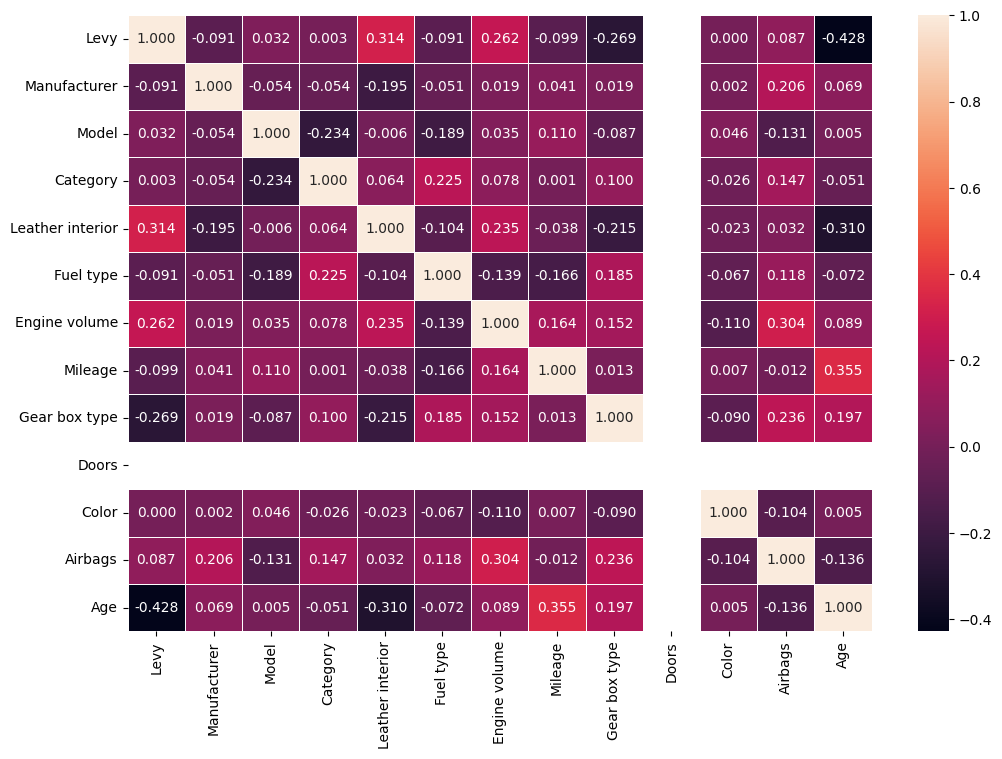

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr,annot=True,fmt='.3f',linewidth=.5)
plt.show()

## Saving test and train data

In [45]:
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

train_data.to_csv("train.csv", index=False)
test_data.to_csv("test.csv", index=False)

# Training Model

In [46]:
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [48]:
model_file = './models/car_price_prediction_model_RandomForestRegressor.pkl'
with open(model_file, 'wb') as file:
    pickle.dump(model, file)

# Evaluating Model

### Collect model and encoders

In [49]:
model_file = './models/car_price_prediction_model_RandomForestRegressor.pkl'
category_encoder_file = './models/category_encoder.pkl'
color_encoder_file = './models/color_encoder.pkl'
fuel_encoder_file = './models/fuel_encoder.pkl'
doors_encoder_file = './models/doors_encoder.pkl'
drive_encoder_file = './models/drive_encoder.pkl'
gear_encoder_file = './models/gear_encoder.pkl'
leather_encoder_file = './models/leather_encoder.pkl'
steering_encoder_file = './models/steering_encoder.pkl'
model_encoder_file = './models/model_encoder.pkl'
manufacturer_encoder_file = './models/manufacturer_encoder.pkl'

### Load pickled encoders

In [50]:
with open(model_file, 'rb') as file:
    model = pickle.load(file)
with open(category_encoder_file, 'rb') as file:
    category_encoder = pickle.load(file)
with open(color_encoder_file, 'rb') as file:
    color_encoder = pickle.load(file)
with open(fuel_encoder_file, 'rb') as file:
    fuel_encoder = pickle.load(file)
with open(doors_encoder_file, 'rb') as file:
    doors_encoder = pickle.load(file)
with open(drive_encoder_file, 'rb') as file:
    drive_encoder = pickle.load(file)
with open(gear_encoder_file, 'rb') as file: 
    gear_encoder = pickle.load(file)
with open(leather_encoder_file, 'rb') as file:
    leather_encoder = pickle.load(file)
with open(steering_encoder_file, 'rb') as file:
    steering_encoder = pickle.load(file)
with open(model_encoder_file, 'rb') as file:
    model_encoder = pickle.load(file)
with open(manufacturer_encoder_file, 'rb') as file:
    manufacturer_encoder = pickle.load(file)

### Define data preprocessing steps

In [51]:
def process_mileage(x):
    return x.str.replace('km', '').astype(int)

def process_engine_volume(x):
    return x.str.replace('Turbo', '').astype(float)

def process_levy(x):
    return x.replace('-', '0').astype(int)

def process_age(x):
    current_year = datetime.datetime.now().year
    return current_year - x

def process_leather(x):
    # Replace 'Yes' with 1.0 and 'No' with 0.0
    x = x.replace({'Yes': '1.0', 'No': '0.0'})
    return x.astype(float)


In [52]:
class LabelEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, encoder):
        self.encoder = encoder  # LabelEncoder instance

    def fit(self, X, y=None):
        # Ensure X is a Series or 1D array
        X = X.squeeze() if isinstance(X, pd.DataFrame) else X
        self.encoder.fit(X)
        return self

    def transform(self, X):
        # Ensure X is a Series or 1D array
        X = X.squeeze() if isinstance(X, pd.DataFrame) else X

        # Apply transformation and handle unknown values by setting NaN
        return np.array([
            self.encoder.transform([x])[0] if x in self.encoder.classes_ else np.nan
            for x in X
        ]).reshape(-1, 1)

In [53]:
def HandleModelAndManufacturer(X_test, column_name, encoder_name, y_test):
    X_test[column_name] = X_test[column_name].apply(
        lambda x: encoder_name.transform([x])[0] if x in encoder_name.classes_ else np.nan
    )
    
    # Drop rows where column_name has NaN values
    X_test.dropna(subset=[column_name], inplace=True)
    
    # Ensure y_test is aligned by dropping rows with NaN values from the same index
    y_test = y_test[X_test.index]
    
    return X_test, y_test


### Load test data

In [54]:
test_data = pd.read_csv("test.csv")
X_test = test_data.drop(['Price'], axis=1)
y_test = test_data['Price']
X_test = X_test[y_test > 1000]
y_test = y_test[y_test > 1000]
X_test = X_test.drop(['ID', 'Manufacturer_Model', 'Steering Wheel','Cylinders','Drive wheels'], axis=1, errors='ignore')

### Data Processing

In [55]:
X_test['Levy'] = process_levy(X_test['Levy'])
X_test['Mileage'] = process_mileage(X_test['Mileage'])
X_test['Engine volume'] = process_engine_volume(X_test['Engine volume'])
X_test['Age'] = process_age(X_test['Prod. year'])
X_test['Leather interior'] = process_leather(X_test['Leather interior'])
X_test, y_test = HandleModelAndManufacturer(X_test, 'Model', model_encoder, y_test)
X_test, y_test = HandleModelAndManufacturer(X_test, 'Manufacturer', manufacturer_encoder, y_test)

### Define the column transformer

In [56]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Mileage', 'Engine volume', 'Levy', 'Age', 'Leather interior', 'Model', 'Manufacturer']),
        ('category', LabelEncoderTransformer(category_encoder), ['Category']),
        ('gear', LabelEncoderTransformer(gear_encoder), ['Gear box type']),
        ('doors', LabelEncoderTransformer(doors_encoder), ['Doors']),
        ('color', LabelEncoderTransformer(color_encoder), ['Color']),
        ('fuel', LabelEncoderTransformer(fuel_encoder), ['Fuel type'])
    ])

### Define the full pipeline: Preprocessing + Model

In [57]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

In [ ]:
pipeline.fit(X_test, y_test)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Mileage', 'Engine volume',
                                                   'Levy', 'Age',
                                                   'Leather interior', 'Model',
                                                   'Manufacturer']),
                                                 ('category',
                                                  LabelEncoderTransformer(encoder=LabelEncoder()),
                                                  ['Category']),
                                                 ('gear',
                                                  LabelEncoderTransformer(encoder=LabelEncoder()),
                                                  ['Gear box type']),
                                                 ('doors',
                                                  LabelEncoderTransformer(encoder=LabelEncoder()),
                                                  ['Doors']),
                                                 ('color',
                                                  LabelEncoderTransformer(encoder=LabelEncoder()),
                                                  ['Color']),
                                                 ('fuel',
                                                  LabelEncoderTransformer(encoder=LabelEncoder()),
                                                  ['Fuel type'])])),
                ('model', RandomForestRegressor())])

In [59]:
predictions = pipeline.predict(X_test)

In [60]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

In [61]:
print(f"Model Performance on Test Data:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Model Performance on Test Data:
Mean Absolute Error (MAE): 2222.710886928648
Root Mean Squared Error (RMSE): 4354.110449828451
R-squared (R2): 0.9379287847699593
